## 2. General Exploration & Data Cleaning

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder, MinMaxScaler, StandardScaler

#### 1. What are the first few rows of your loaded DataFrame? How many rows and columns does it have? What are the data types for each column?

In [174]:
# Read Bikeshare dataset
df_bike = pd.read_csv("Bike.csv")
# Rename the ’cnt’ column to ’cnt_rental_bike’ for clarity
df_bike = df_bike.rename(columns={'cnt': 'cnt_rental_bike'})
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [175]:
r, c = df_bike.shape
print(f'number of rows {r}')
print(f'number of columns {c}')

number of rows 17379
number of columns 17


In [176]:
df_bike.dtypes

instant              int64
dteday              object
season               int64
yr                   int64
mnth                 int64
hr                   int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
casual               int64
registered           int64
cnt_rental_bike      int64
dtype: object

#### 2. Are there missing values in your dataset? If so, which columns are affected?

In [177]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season           17379 non-null  int64  
 3   yr               17379 non-null  int64  
 4   mnth             17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday          17379 non-null  int64  
 7   weekday          17379 non-null  int64  
 8   workingday       17379 non-null  int64  
 9   weathersit       17379 non-null  int64  
 10  temp             17379 non-null  float64
 11  atemp            17379 non-null  float64
 12  hum              17379 non-null  float64
 13  windspeed        17379 non-null  float64
 14  casual           17379 non-null  int64  
 15  registered       17379 non-null  int64  
 16  cnt_rental_bike  17379 non-null  int64  
dtypes: float64(4

none of the values missing here 

#### 3. Are there duplicate rows?

In [178]:
df_bike.duplicated().any()
#false so we have at least one duplicate

np.False_

#### 4. The dataset has several columns related to date and time. Create a new column, datetime, that combines the date and time information. What is the appropriate data type for this new column?

In [179]:
df_bike['time and date'] = pd.to_datetime((df_bike['dteday']+' '+df_bike['hr'].astype(str).str.zfill(2)+':00:00'), format="%Y-%m-%d %H:%M:%S")
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


#### 5. Use the function describe() from pandas to analyze basic statistics ofyour data set (no need to use print(), pandas prints a structured table automatically).

In [180]:
df_bike.describe(include="all")                

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,NaN,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00


#### 6. What is the total number of bike rentals? What are the average, minimum, and maximum rental counts?

In [181]:
print(f'Total number of bike rentals is {sum(df_bike['cnt_rental_bike'])}')
print(f'Average is {df_bike['cnt_rental_bike'].mean()}')
print(f'Minimum is {df_bike['cnt_rental_bike'].min()}, maximum is {df_bike['cnt_rental_bike'].max()}')

Total number of bike rentals is 3292679
Average is 189.46308763450142
Minimum is 1, maximum is 977


#### 7. Visualize the distribution of bike rentals between different seasons. Which season has the highest average rental count?

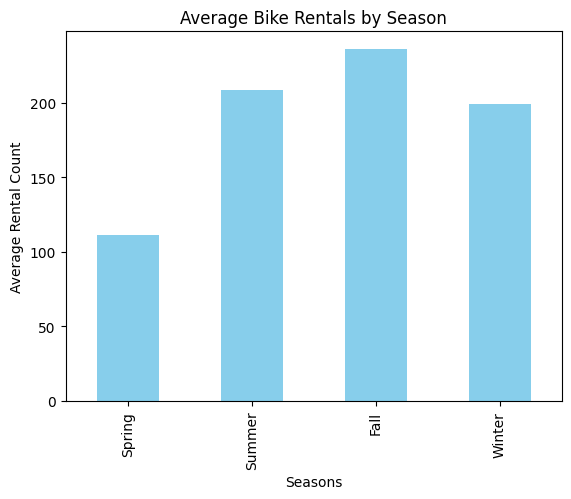

In [182]:
seasons_avrg = df_bike.groupby('season')['cnt_rental_bike'].mean()
seasons_l = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasons_avrg.index = seasons_avrg.index.map(seasons_l)

seasons_avrg.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Seasons')
plt.ylabel('Average Rental Count')
plt.show()


#### 8. Compare the rental numbers for casual users versus registered users. How do their average daily usage patterns differ?

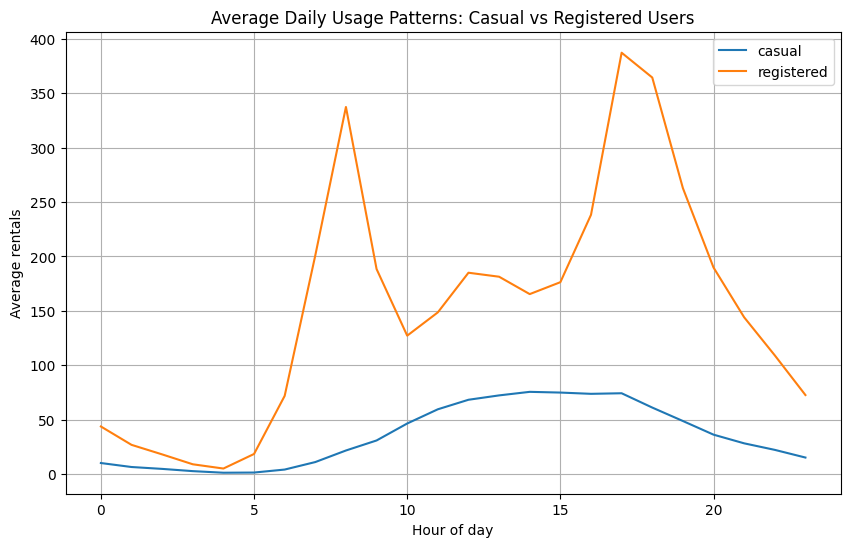

In [183]:
daily_avrg = df_bike.groupby('hr')[['casual', 'registered']].mean()

daily_avrg.plot(kind='line', figsize=(10,6))
plt.title('Average Daily Usage Patterns: Casual vs Registered Users')
plt.xlabel('Hour of day')
plt.ylabel('Average rentals')
plt.grid(True)
plt.show()

#### 9. What are the unique values of weathersit column? Replace them by descriptive labels:
#### •1: ’clear’
#### •2: ’cloudy’
#### •3: ’light rain’
#### •4: ’heavy rain’

In [184]:
weather ={
    1: 'clear',
    2: 'cloudy',
    3: 'light rain',
    4: 'heavy rain'
}

df_bike['weathersit'] = df_bike['weathersit'].astype(int).map(weather)
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


#### 10. What is the data type of the weathersit column?

In [187]:
print(df_bike['weathersit'].dtype)

object


#### 11. Visualize the relationship between weather conditions (weathersit) and the number of rentals. Which weather situation corresponds to the highest number of rentals on average? Does it make sense?

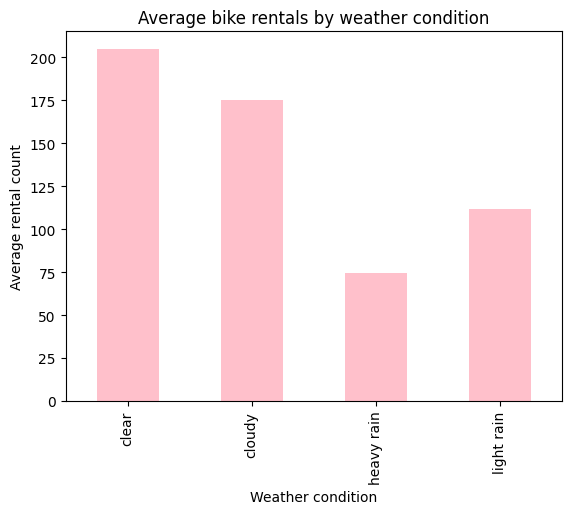

In [191]:
weather_avrg = df_bike.groupby('weathersit')['cnt_rental_bike'].mean()
weather_avrg.plot(kind='bar', color='pink')
plt.title('Average bike rentals by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Average rental count')
plt.show()

#### 12. Use the function OneHotEncoder from Scikitlearn to encode your column.

In [194]:
encode = OneHotEncoder(sparse_output=False) 
encoded = encode.fit_transform(df_bike[['weathersit']])
print(encoded[:5])              
print(encode.get_feature_names_out(['weathersit']))  


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
['weathersit_clear' 'weathersit_cloudy' 'weathersit_heavy rain'
 'weathersit_light rain']


#### 13. Consider the advantages and disadvantages of using one-hot encoding on a categorical variable. Does your answer depend on whether the variable is nominal (no order, like weather) or ordinal (has a natural order, like a rating scale)?

#### advantages simple, avoids false ordering, works well with ml models
#### disadvantages creates too many columns if categories are num saperate data, loses order info 
#### for the nominal varibles one hot is ideal, for ordinal varibles it is not good choice better to use ordinal encoding 

#### 14. What can you say about the linear dependence of the columns produced by one-hot encoding? What solution exists to avoid this problem? Change your OneHotEncoder function accordingly.

#### linear dependence is one hot columns for a k level category sum to 1 -> rank = k-1 with an intercept this causes perfect dummy varible trap in linear models.we can fix by dropping one baseline cartegory (most common one) remove all the intercept or use the model that tolerate collinearrity 

In [ ]:
a = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
fit = a.fit_transform(df_bike[['weathersit']])
fit


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### 15. Repeat the process of encoding using ordinal encoding for a suitable cate- gorical column. Why can we consider that this method is more appropriate than one-hot encoding?

#### more appropriate because it preserves the order relationshop between categories

In [201]:
enc = OrdinalEncoder()
df_bike['season_encoded'] = enc.fit_transform(df_bike[['season']])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date,season_encoded
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00,0.0
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00,0.0
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00,0.0
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00,0.0


#### 16. Choose a numerical feature and normalize it to a range of [0,1].

In [204]:
scaler = MinMaxScaler()
df_bike['temp_norm'] = scaler.fit_transform(df_bike[['temp']])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date,season_encoded,temp_norm
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,0.0,0.224490
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00,0.0,0.204082
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00,0.0,0.204082
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00,0.0,0.224490
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00,0.0,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00,0.0,0.244898
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00,0.0,0.244898
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00,0.0,0.244898
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00,0.0,0.244898


#### 17. Standardize the same feature using standardization.

In [206]:
std_scaler = StandardScaler()
df_bike['temp_std'] = std_scaler.fit_transform(df_bike[['temp']])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt_rental_bike,time and date,season_encoded,temp_norm,temp_std
0,1,2011-01-01,1,0,1,0,0,6,0,clear,...,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,0.0,0.224490,-1.334648
1,2,2011-01-01,1,0,1,1,0,6,0,clear,...,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00,0.0,0.204082,-1.438516
2,3,2011-01-01,1,0,1,2,0,6,0,clear,...,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00,0.0,0.204082,-1.438516
3,4,2011-01-01,1,0,1,3,0,6,0,clear,...,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00,0.0,0.224490,-1.334648
4,5,2011-01-01,1,0,1,4,0,6,0,clear,...,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00,0.0,0.224490,-1.334648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,...,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00,0.0,0.244898,-1.230779
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,...,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00,0.0,0.244898,-1.230779
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,...,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00,0.0,0.244898,-1.230779
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,...,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00,0.0,0.244898,-1.230779


#### 18. Which features would you consider normalizing, and which would you standardize? Justify your choices based on their distributions.

#### Normalize ([0,1]) when features hve diff scales but similar distribution shapes and need to bounded values ex: temp and windspeed
#### Standardize (mean=0, std=1) when features are normally dist or when algorithms assume bell curved ex: num and cnt_rental_bike 

## 3.Conceptual Questions

### 1. A column with values ’male’, ’female’, ’NaN’ is an example of what type of data? 
#### ans: b) nominal

### 2. Explain the difference between nominal and ordinal data types. Provide an example for each that is not from this dataset.
#### ans: Nominal data is categories without order, ex types of fruits apple, orange, banana. Ordinal data is categories with order, example raiting: poor, avreg, good

### 3. If two features are perfectly linearly dependent, it means they contain redundant information for a linear model.
#### •(A) True- perfect dependence means redundancy 

### 4. Consider a one-hot encoded feature with N categories. If you do not drop any of the one-hot columns, what is the relationship between the sum of the values in these N columns and the number of rows?
#### ans: for one hot with N categories each row has exactly one 1 so the sum of val in this N colunms equal the number of rows 

### 5. Why is it a common practice to drop one of the columns after one-hot encoding a feature for use in a linear regression model? What is the statistical term for this issue?
#### ans:we drop one column to avoid multicollearity which happens when the one hot columns are linearly dependent 

### 6. You have a dataset with a column representing a country’s rank in a competition (1st, 2nd, 3rd, etc.). Would you recommend using one-hot encoding or ordinal encoding for this feature? Justify your choice.
#### ans: use the ordinal encoding bc ranks have a meaningful order thet one hot would ignore

### 7. Describe a scenario where using one-hot encoding could lead to a significant increase in the dimensionality of your dataset.
#### ans: if u one hot encode a variable with many categories u add too many colunms making the data set very wide and harder for the nodel train.

### 8. Which of the following scaling methods transforms the data to have a mean of 0 and a standard deviation of 1?
#### ans: B) standardization makes data have mean 0 and standard deviation 1 which is useful when features are on very diff scales.

### 9. Normalization is generally preferred when the data contains significant outliers, as it is more robust to them than standardization.
#### •(B) False - normalization is sensitive to outliers while robust scaling is better when there are extreme values.

### 10. A feature has values {10,22,27,53}. Calculate the normalized values for this feature using Min-Max scaling.
#### ans: min=10 max=53 -> 10-0, 22- (22-10)/(53-10)=0.28, 27- (27-10)/(53-10)=0.40, 53- (53-10)/53-10=1 -> {0,0.28,0.40,1}

### 11. A feature has a mean (μ) of 50 and a standard deviation (σ) of 10. A specific data point has a value of 75. Calculate its standardized value (Z-score).
#### z=(75-50)/10=2.5 this means the value 75 is 2.5 standars dev above the mean. 

### 12. What is the main purpose of scaling features before training a machine learning model? Name at least two types of models that are particularly sensitive to the scale of input features.
#### ans: Scaling makes features comparable so no single features dominates bc of its sacle and helps models converge faster model like knn svm linear reg are especally sensetive to scaling. 

